1. Importing all necessary libraries

In [1]:
#'Pandas' for data manipulation and analysis
import pandas as pd 
#'Numpy' for numerical operations
import numpy as np 
# 'Matplotlib' for data visualization
import matplotlib.pyplot as plt
# 'Seaborn' for statistical data visualization
import seaborn as sns
# 'os' module for operating system dependent functionality
import os
# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

2. Importing and Exploring Dataset 

In [2]:
# loading the dataset and setting the client_id as index because it is unique for each client
df = pd.read_csv('loan_dataset.csv', index_col=0) 

In [3]:
# showing first five rows of the dataset:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
# showing shape of the data (cols, rows):
df.shape

(443, 7)

In [5]:
# to get a concise summary of the DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


Above output shows all the columns in dataset, their data types and null values of they have.
Advantage: No need to check null values and data types explicitly.

3. changing data types of columns 

In [6]:
df['loan_id'] =df['loan_id'].astype('object')
df['repaid']=df['repaid'].astype('category')
df['loan_start'] = pd.to_datetime(df['loan_start'], format='%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format='%Y-%m-%d')

Checking the datatypes again:

In [7]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

4. Summary Statistics of the data

In [8]:
# getting statistical summary of numerical columns
df.describe()

,loan_amount,loan_start,loan_end,rate
count,443.000000,443,443,443.000000
mean,7982.311512,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,559.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,4232.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,8320.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,11739.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,14971.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,4172.891992,NaN,NaN,2.397168


In [9]:
# getting statistical summary of categorical columns
df.describe(include=['object','category'])

,loan_type,repaid,loan_id
count,443,443,443
unique,4,2,443
top,home,1,11434
freq,121,237,1


5. Missing Values

In [10]:
# checking for missing values in each column
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

No missing values in the data.
Sk-learn library has an in-built function called Iterative Imputer to impute the missing values. Its sklearn domcumentation:
 https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
 

6. Outlier Treatment

To check for the presence of outliers, we plot Boxplot.

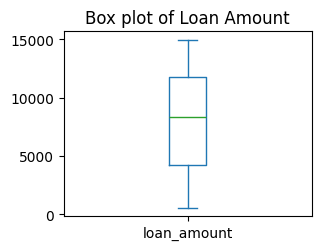

In [11]:
df['loan_amount'].plot(kind='box',figsize=(3.2,2.4))
plt.title('Box plot of Loan Amount')
plt.show()

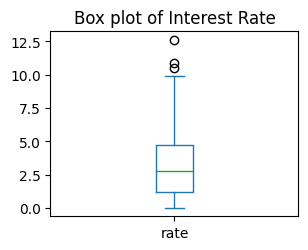

In [15]:
df['rate'].plot(kind='box',figsize=(3.2,2.4),)
plt.title('Box plot of Interest Rate')
plt.show()

We can see that there are no outliers in the loan_amount column and some outliers are present in the rate column. To treat for outliers can either cap the values or transform the data. Shall demonstrate both the approaches here.

7. Transformation

7a. SQRT Transformation

In [13]:
df['sqrt_rate'] = np.sqrt(df['rate'])
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


7b. Log Transformation

In [14]:
df['Log_rate'] = np.log(df['rate'])
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,Log_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033


In [16]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.sqrt_rate.skew()))
print("The skewness of the LOG transformed data is {}".format(df['Log_rate'].skew()))

print('')


print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.sqrt_rate.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df['Log_rate'].kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewness of the LOG transformed data is -1.5943217626331552

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039
The kurtosis of the LOG transformed data is 4.157026150198228


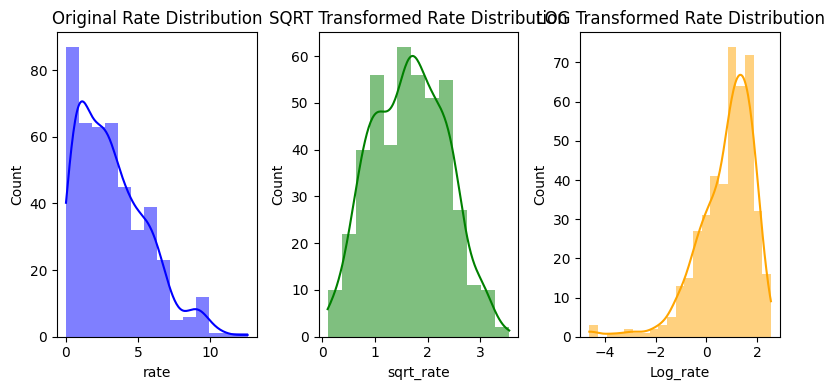

In [17]:
fig, subplot = plt.subplots(1, 3, figsize=(8, 4))
sns.histplot(df['rate'], kde=True, ax=subplot[0], color='blue', edgecolor='none') #kde = kernel density estimate line over histogram
subplot[0].set_title('Original Rate Distribution')

sns.histplot(df['sqrt_rate'], kde=True, ax=subplot[1], color='green', edgecolor='none') #edgecolor='none' removes border lines around bars
subplot[1].set_title('SQRT Transformed Rate Distribution')

sns.histplot(df['Log_rate'], kde=True, ax=subplot[2], color='orange', edgecolor='none')
subplot[2].set_title('LOG Transformed Rate Distribution')
plt.tight_layout()
plt.show()

The Rate column was right skewed earlier. The skewness and kurtosis as reduced significantly. The transformed SQRT rate, on the right graph resembles normal distribution now.
Log Transformation made the rate left skewed and more peaked.
However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.

In our case, square root transformation is more suitable.


Dropping unused columns

In [ ]:
df.drop(columns=['rate','Log_rate','Log Rate'], inplace=True)
df.columns


8. Standardization 

If the model you'll use in ML is distance based like KNN, K-Means etc. then it's necessary to scale your data.

In [19]:
from sklearn.preprocessing import StandardScaler
df2 = df[['loan_amount','sqrt_rate']]
ss = StandardScaler()
df2_scaled = ss.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns, index=df2.index)
df2_scaled.head()

,loan_amount,sqrt_rate
client_id,,
46109,1.365030,-0.267842
46109,0.434647,-0.767796
46109,1.139991,-1.189020
46109,1.088170,-0.774229
46109,1.455477,0.166991


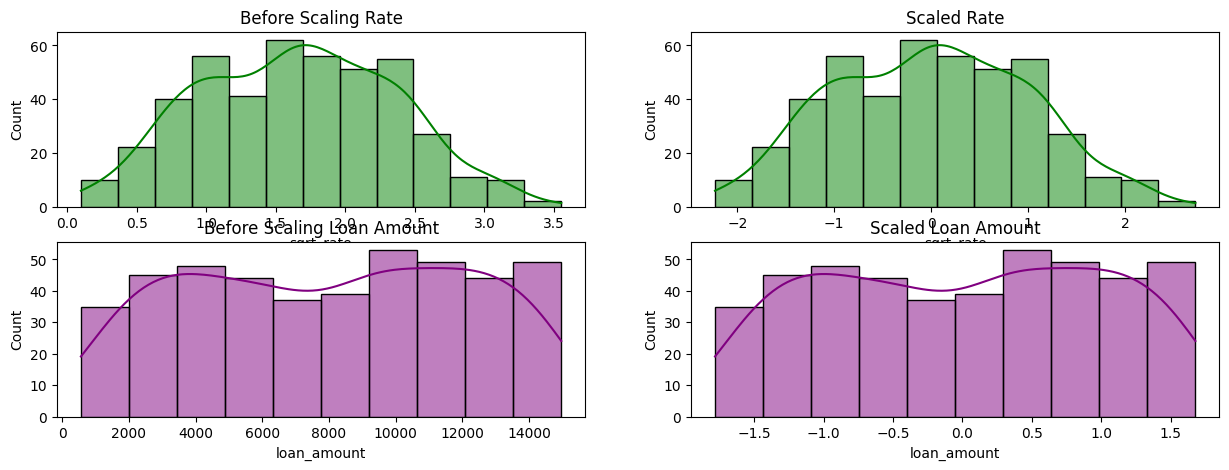

In [20]:
fig, ax = plt.subplots(2,2, figsize=(15,5))
sns.histplot(df['sqrt_rate'], kde=True, ax=ax[0,0], color='green')
ax[0,0].set_title('Before Scaling Rate')
sns.histplot(df2_scaled['sqrt_rate'], kde=True, ax=ax[0,1], color='green')
ax[0,1].set_title('Scaled Rate')
sns.histplot(df['loan_amount'], kde=True, ax=ax[1,0], color='purple')
ax[1,0].set_title('Before Scaling Loan Amount')
sns.histplot(df2_scaled['loan_amount'], kde=True, ax=ax[1,1], color='purple')
ax[1,1].set_title('Scaled Loan Amount')
plt.show()

The only difference between the two curves is of the Range on the x-axis. The impact of scaling on data is: Skewness, Kurtosis and Distribution all remain same.

The need for Scaling is :

1. Comparison between variables is easier\
2. Computation power is more efficient and less time consuming.

9. Encoding Categorical Features

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder( sparse_output=False,drop='first').fit(df[['loan_type']]) # drop='first' to avoid dummy variable trap
ohe.categories_

[array(['cash', 'credit', 'home', 'other'], dtype=object)]

10. Feature Construction

We can derive a new feature tenure of the loan, using loan_start and loan_end features.

In [22]:
import datetime as dt   
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days
df[['loan_start','loan_end','loan_tenure']].head()

,loan_start,loan_end,loan_tenure
client_id,,,
46109,2002-04-16,2003-12-20,613
46109,2003-10-21,2005-07-17,635
46109,2006-02-01,2007-07-05,519
46109,2010-12-08,2013-05-05,879
46109,2010-07-07,2012-05-21,684


11. Test and Train split

In [23]:
# training and test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['repaid'])
y = df['repaid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((354, 9), (89, 9), (354,), (89,))